# Spectral Step Gradient Methods

**by Amal MACHTALAY**  

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Etape  1.

Reprendre un algorithme de minimisation par gradient à pas variable (ou à pas constant) :

\begin{equation}
u^{(0)} \textrm{ donné}; \quad u^{(k+1)} = u^{(k)} - \rho_k \nabla J(u^{(k)})
\end{equation}


> Modifier cet algorithme de sorte à ce que le pas $\rho_k$ soit donné par l'une des deux variantes, dites de Barzilaï et Borwein :

$$
\rho^1_k = \dfrac{(s^{(k-1)} ,s^{(k-1)})}{(y^{(k-1)} ,s^{(k-1)})} ;
\qquad 
\rho^2_k = \dfrac{(s^{(k-1)} ,y^{(k-1)})}{(y^{(k-1)} ,y^{(k-1)})}
$$
Cet algorithme (noté BB1 et BB2 selon variante) nécessite donc un pré-calcul de $u^{(1)}$ avec un pas initial $\rho_0$ décidé par l'utilisateur.

On introduit les deux notations :

$$ \left\{
\begin{array}{ccc}
s^{(k-1)} & = & u^{(k)} - u^{(k-1)} \\
y^{(k-1)} & = & \nabla J(u^{(k)}) - \nabla J(u^{(k-1)}) \\
 \end{array}
\right.
$$

In [2]:
def BB1(u, rho, NbrIter, epsJ, j):
    
    # u       : initial guess
    # rho     : initial step
    # NbrIter : maximum number of iterations
    # epsJ    : stop condition for gradient
    # j       : index of the cost function
    
    U=[0]*(NbrIter)  # U=[u,0,....,0]
    U[0]=u
    # cost_history
    cost_history=[]
    # Gradient_history
    gradJ=[0]*(NbrIter) # gradJ=[gradJ(u),0,....,0]
    [J,gradJ[0]]=cost(j,U[0])
    # step_history
    Rho=[0]*(NbrIter) # Rho=[rho,0,....,0]
    Rho[0]=rho
    
    for i in range(0,NbrIter-1):
        cost_history.append(J)
        
        if np.linalg.norm(gradJ[i])<= epsJ :
            break
            
        U[i+1]=U[i]-Rho[i]*gradJ[i]
        [J,gradJ[i+1]]=cost(j,U[i+1])
        
        # Barzilai variant
        s=U[i+1]-U[i]
        y=gradJ[i+1]-gradJ[i]
        Rho[i+1]=np.dot(s,s)/np.dot(y,s)
    
    return U, i, cost_history 

def BB2(u, rho, NbrIter, epsJ, j):
    
    # u       : initial guess
    # rho     : initial step
    # NbrIter : maximum number of iterations
    # epsJ    : stop condition for gradient
    # j       : index of the cost function
    
    U=[0]*(NbrIter)  # U=[u,0,....,0]
    U[0]=u
    # cost_history
    cost_history=[]
    # Gradient_history
    gradJ=[0]*(NbrIter) # gradJ=[gradJ(u),0,....,0]
    [J,gradJ[0]]=cost(j,U[0])
    # step_history
    Rho=[0]*(NbrIter) # Rho=[rho,0,....,0]
    Rho[0]=rho
    
    for i in range(0,NbrIter-1):
        cost_history.append(J)
        if np.linalg.norm(gradJ[i])<= epsJ :
            break
            
        U[i+1]=U[i]-Rho[i]*gradJ[i]
        [J,gradJ[i+1]]=cost(j,U[i+1])

        # Borwein variant
        s=U[i+1]-U[i]
        y=gradJ[i+1]-gradJ[i]
        Rho[i+1]=np.dot(s,y)/np.dot(y,y)
    
    return U, i, cost_history
 

### Etape 2.

On considère les fonctions suivantes (en dimension $N$):

$$J_1(v) = \sum_{i=1}^{i=N}{(v_i - 1)^2}, \quad J_2(v) = \sum_{i=1}^{i=N}{(v_i - i)^2}$$ 

$$
J_5(v) =\frac{1}{2}(Av,v)-(f,v) + \sum_{i=1}^{i=N}{(v_i)^2}, \quad \quad \quad 
J_6(v) =\frac{1}{2}(Av,v)-(f,v) + \sum_{i=1}^{i=N}{(v_i)^4}
$$

avec $f=(1,\ldots,1)$ et la matrice $A = {\rm tridiag}[-1, 2, -1]$  

La fonction de Rosenbrock :

$$
J_R(v) = \sum_{i=1}^{N-1}(v_{i+1}-v_i^2)^2 + \sum_{i=1}^{N-1} (v_i - 1)^2
$$

In [3]:
def J1(v):
    N=len(v)
    ones=np.ones(N)
    return [np.dot(v-ones,v-ones), 2*(v-ones)]

def J2(v):
    N=len(v)
    g=np.arange(1,N+1) # array([1,2,.....,N])
    return [np.dot(v-g,v-g) , 2*(v-g)]

def tridiag(n,x,y,z,k1=-1, k2=0, k3=1):
    a = [x]*(n-abs(k1)) 
    b = [y]*(n-abs(k2)) 
    c = [z]*(n-abs(k3))
    return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)

def J5(v):
    N=len(v)
    f=np.ones(N)
    A=tridiag(N,-1,2,-1)
    J=0.5*np.dot(np.dot(A,v),v)-np.dot(f,v)+np.dot(v,v)
    gradJ=-np.append(0,v[:-1])+np.multiply(v,2)-np.append(v[1:],0)-f+np.multiply(v,2)
    return [J, gradJ]

def J6(v):
    N=len(v)
    f=np.ones(N)
    A=tridiag(N,-1,2,-1)
    J=0.5*np.dot(np.dot(A,v),v)-np.dot(f,v)+np.sum(np.power(v,4))
    gradJ=-np.append(0,v[:-1])+np.multiply(v,2)-np.append(v[1:],0)-f+np.multiply(np.power(v,3),4)
    return [J, gradJ]

def JR(v):
    N=len(v)
    f=np.ones(N-1)
    w=v[1:]-v[:-1]**2
    J=np.dot(w,w)+np.dot(v[:-1]-f,v[:-1]-f)
    gradJ=np.zeros(N)
    gradJ[0]=-4*v[0]*(v[1]-v[0]**2)+2*(v[0]-1)
    gradJ[-1]=2*(v[-1]-v[-2]**2)
    gradJ[1:-1]=-4*v[1:-1]*(v[2:]-v[1:-1]**2)+2*(v[1:-1]-v[:-2])+2*(v[1:-1]-np.ones(N-2))
    return [J, gradJ]


def cost(j,v):  # choose your cost function J1, J2, J5, J6, or JR 
    if j==1:
        return J1(v)  
    if j==2:
        return J2(v)
    if j==5:
        return J5(v)  
    if j==6:
        return J6(v)
    if j=='R':
        return JR(v)

### Etape 3.

> Effectuer les tests de validation pour les fonctions quadratiques $J_1, J_2$ ($N=10$).


With BB1, convergence of J1 on : 2 iterations
u = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
cost_history : [10.0, 2.5, 0.0]


With BB2, convergence of J1 on : 2 iterations
u = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
cost_history : [10.0, 2.5, 0.0]


With BB1, convergence of J2 on : 2 iterations
u = [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
cost_history : [385.0, 96.25, 0.0]


With BB2, convergence of J2 on : 2 iterations
u = [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
cost_history : [385.0, 96.25, 0.0]




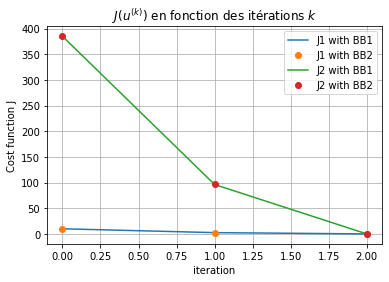

In [4]:
#### Inputs
N= 10 
u0= np.zeros(N)
#u0=[-10]*(N)
rho0 = 0.25
eps = 1.e-10
MaxIter = 100

#### Outputs
# For J1 using BB1
uBB1, iBB1, costBB1 = BB1(u0,rho0,MaxIter,eps,1)
print('With BB1, convergence of J1 on :' ,iBB1, 'iterations');
print('u =' ,uBB1[iBB1])
print('cost_history :' ,costBB1)
print('\n')

# For J1 using BB2
uBB2, iBB2, costBB2 = BB2(u0,rho0,MaxIter,eps,1)
print('With BB2, convergence of J1 on :' ,iBB2, 'iterations');
print('u =' ,uBB2[iBB2])
print('cost_history :' ,costBB2)
print('\n')

# For J2 using BB1
vBB1, jBB1, CostBB1 = BB1(u0,rho0,MaxIter,eps,2)
print('With BB1, convergence of J2 on :' ,jBB1, 'iterations');
print('u =' ,vBB1[jBB1])
print('cost_history :' ,CostBB1)
print('\n')

# For J2 using BB2
vBB2, jBB2, CostBB2 = BB2(u0,rho0,MaxIter,eps,2)
print('With BB2, convergence of J2 on :' ,jBB2, 'iterations');
print('u =' ,vBB2[jBB2])
print('cost_history :' ,CostBB2)
print('\n')

#### Plots
plt.plot(np.arange(iBB1+1),costBB1,label='J1 with BB1')
plt.plot(np.arange(iBB2+1),costBB2,'o',label='J1 with BB2')
plt.plot(np.arange(jBB1+1),CostBB1,label='J2 with BB1')
plt.plot(np.arange(jBB2+1),CostBB2,'o',label='J2 with BB2')
plt.xlabel("iteration")
plt.ylabel("Cost function J")
plt.title('$J(u^{(k)})$ en fonction des itérations $k$')
plt.legend()
plt.grid()

### Etape 4.

> Minimiser les fonctions $J_5$, $J_6$  et $J_R$ par BB1 et par BB2 ($N=10, 20, 40, 80$), et comparer les performances de ces deux variantes.
On tracera sur un même graphique les courbes BB1 et BB2 de $J(u^{(k)})$ en fonction des itérations $k$.

With BB1, convergence of J5 on : 18 iterations
u = [0.36602452 0.46409807 0.49036778 0.49737303 0.49912434 0.49912434
 0.49737303 0.49036778 0.46409807 0.36602452]


With BB2, convergence of J5 on : 19 iterations
u = [0.36602452 0.46409807 0.49036778 0.49737303 0.49912434 0.49912434
 0.49737303 0.49036778 0.46409807 0.36602452]




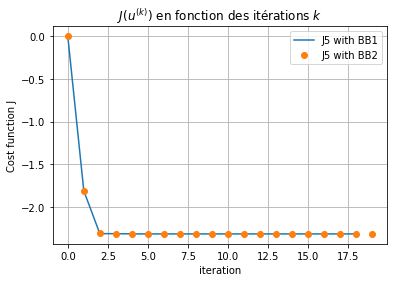

In [5]:
#### Inputs
N= 10 
u0= np.zeros(N)
rho0 = 0.25
eps = 1.e-10
MaxIter = 100

#### Outputs
# For J5 using BB1
uBB1, iBB1, costBB1 = BB1(u0,rho0,MaxIter,eps,5)
print('With BB1, convergence of J5 on :' ,iBB1, 'iterations');
print('u =' ,uBB1[iBB1])
#print('cost_history :' ,costBB1)
print('\n')

# For J5 using BB2
uBB2, iBB2, costBB2 = BB2(u0,rho0,MaxIter,eps,5)
print('With BB2, convergence of J5 on :' ,iBB2, 'iterations');
print('u =' ,uBB2[iBB2])
#print('cost_history :' ,costBB2)
print('\n')

#### Plots
plt.plot(np.arange(iBB1+1),costBB1,label='J5 with BB1')
plt.plot(np.arange(iBB2+1),costBB2,'o',label='J5 with BB2')
plt.xlabel("iteration")
plt.ylabel("Cost function J")
plt.title('$J(u^{(k)})$ en fonction des itérations $k$')
plt.legend()
plt.grid()

With BB1, convergence of J6 on : 21 iterations
u = [0.522072   0.61332607 0.62743683 0.62957732 0.62989402 0.62989402
 0.62957732 0.62743683 0.61332607 0.522072  ]


With BB2, convergence of J6 on : 19 iterations
u = [0.522072   0.61332607 0.62743683 0.62957732 0.62989402 0.62989402
 0.62957732 0.62743683 0.61332607 0.522072  ]




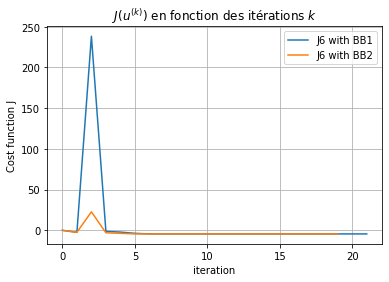

In [6]:
#### Inputs
N= 10
u0= np.zeros(N)
rho0 = 0.25
eps = 1.e-10
MaxIter = 100

#### Outputs
# For J6 using BB1
vBB1, jBB1, CostBB1 = BB1(u0,rho0,MaxIter,eps,6)
print('With BB1, convergence of J6 on :' ,jBB1, 'iterations');
print('u =' ,vBB1[jBB1])
#print('cost_history :' ,CostBB1)
print('\n')

# For J6 using BB2
vBB2, jBB2, CostBB2 = BB2(u0,rho0,MaxIter,eps,6)
print('With BB2, convergence of J6 on :' ,jBB2, 'iterations');
print('u =' ,vBB2[jBB2])
#print('cost_history :' ,CostBB2)
print('\n')

#### Plots
plt.plot(np.arange(jBB1+1),CostBB1,label='J6 with BB1')
plt.plot(np.arange(jBB2+1),CostBB2,label='J6 with BB2')
plt.xlabel("iteration")
plt.ylabel("Cost function J")
plt.title('$J(u^{(k)})$ en fonction des itérations $k$')
plt.legend()
plt.grid()

With BB1, convergence of JR on : 66 iterations
u = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


With BB2, convergence of JR on : 74 iterations
u = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]




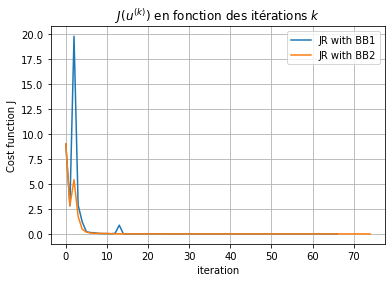

In [7]:
#### Inputs
N= 10 
u0= np.zeros(N)
rho0 = 0.25
eps = 1.e-10
MaxIter = 100

#### Outputs
# For JR using BB1
wBB1, kBB1, ccostBB1 = BB1(u0,rho0,MaxIter,eps,'R')
print('With BB1, convergence of JR on :' ,kBB1, 'iterations');
print('u =' ,wBB1[kBB1])
#print('cost_history :' ,ccostBB1)
print('\n')

# For JR using BB2
wBB2, kBB2, ccostBB2 = BB2(u0,rho0,MaxIter,eps,'R')
print('With BB2, convergence of JR on :' ,kBB2, 'iterations');
print('u =' ,wBB2[kBB2])
#print('cost_history :' ,ccostBB2)
print('\n')

#### Plots
plt.plot(np.arange(kBB1+1),ccostBB1,label='JR with BB1')
plt.plot(np.arange(kBB2+1),ccostBB2,label='JR with BB2')
plt.xlabel("iteration")
plt.ylabel("Cost function J")
plt.title('$J(u^{(k)})$ en fonction des itérations $k$')
plt.legend()
plt.grid()

## Conclusion 

- For strictly convex quadratic functions ($J_1,J_2$) the $BB1$ and $BB2$ methods are equivalent; they converge rapidly and the cost function decrease quasi-linearly.
- For Non-convex functions, a stochastic behavior appeared and the cost function did not decrease monotonically.
- $BB1$ and $BB2$ can be considered the best methods for solving strictly convex quadratic problems. However, it's not recommended for minimizing general (not necessarily quadratic) functions.